In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('C:/Users/Roshan/Downloads/anemia_dataset.csv', index_col = False)


In [3]:
df.head()


,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(inplace = True, axis = 1)


In [5]:
df.head()


,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No


In [6]:
df.columns


Index(['Number', 'Name', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Name          104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [8]:
df.describe()


,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [9]:
df.shape


(104, 7)

In [10]:
df.drop(["Name", "Number"], inplace = True, axis = 1)


In [11]:
df.head()


,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,Yes
1,45.6033,28.1900,26.2067,13.5,No
2,45.0107,28.9677,26.0215,11.7,No
3,44.5398,28.9899,26.4703,13.5,No
4,43.2870,30.6972,26.0158,12.4,No


In [12]:
df_hb = df.drop(["Anaemic"], axis = 1)
df_anemia = df.drop(['Hb'], axis = 1)

In [13]:
df_hb.head()


,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,43.2555,30.8421,25.9025,6.3
1,45.6033,28.1900,26.2067,13.5
2,45.0107,28.9677,26.0215,11.7
3,44.5398,28.9899,26.4703,13.5
4,43.2870,30.6972,26.0158,12.4


In [14]:
df_anemia.head()


,%Red Pixel,%Green pixel,%Blue pixel,Anaemic
0,43.2555,30.8421,25.9025,Yes
1,45.6033,28.1900,26.2067,No
2,45.0107,28.9677,26.0215,No
3,44.5398,28.9899,26.4703,No
4,43.2870,30.6972,26.0158,No


In [15]:
df_anemia.Anaemic.replace({"Yes": 1, "No": 0}, inplace = True)


C:\Users\Roshan\AppData\Local\Temp\ipykernel_6472\2472490233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_anemia.Anaemic.replace({"Yes": 1, "No": 0}, inplace = True)
C:\Users\Roshan\AppData\Local\Temp\ipykernel_6472\2472490233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_anemia.A

In [16]:
df_anemia.head()


,%Red Pixel,%Green pixel,%Blue pixel,Anaemic
0,43.2555,30.8421,25.9025,1
1,45.6033,28.1900,26.2067,0
2,45.0107,28.9677,26.0215,0
3,44.5398,28.9899,26.4703,0
4,43.2870,30.6972,26.0158,0


In [17]:
df_anemia["Anaemic"].value_counts()


Anaemic
0    78
1    26
Name: count, dtype: int64

<Axes: xlabel='Anaemic'>

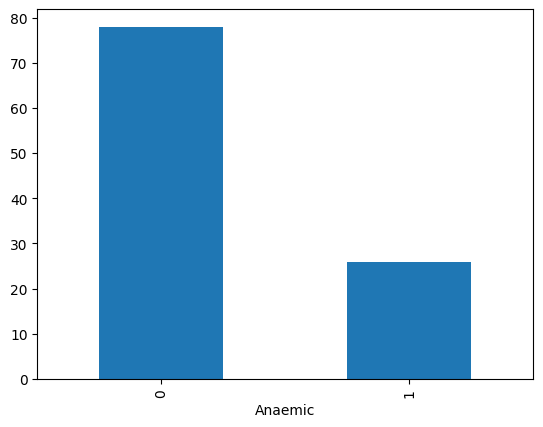

In [18]:
df_anemia["Anaemic"].value_counts().plot(kind = 'bar')


In [19]:
from sklearn.model_selection import train_test_split
X = df_anemia.drop(['Anaemic'], axis = 1)
y = df_anemia['Anaemic']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)


In [21]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.67      0.40      0.50         5

    accuracy                           0.81        21
   macro avg       0.75      0.67      0.69        21
weighted avg       0.79      0.81      0.79        21



In [24]:
df_hb.head()


,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,43.2555,30.8421,25.9025,6.3
1,45.6033,28.1900,26.2067,13.5
2,45.0107,28.9677,26.0215,11.7
3,44.5398,28.9899,26.4703,13.5
4,43.2870,30.6972,26.0158,12.4


In [25]:
X1 = df_hb.drop(['Hb'], axis = 1)
y1 = df_hb['Hb']

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 24)


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [28]:
lr1 = LinearRegression()


In [29]:
lr1.fit(X_train1,y_train1)


LinearRegression()

In [30]:
y_pred1 = lr1.predict(X_test1)


In [31]:
y_pred1


array([13.85978823, 15.3729316 , 12.95648287, 13.68076401, 12.80487265,
       10.71068613,  9.85217194, 14.63333621, 14.49910885, 12.2091524 ,
       10.94174713, 13.9107104 , 14.66470848, 12.82294465, 11.29125721,
       11.45619235, 13.19815182, 11.22244036, 12.52770099,  9.2670118 ,
       13.49645966])

In [32]:
y_test1


9      9.7
14    14.6
86    14.0
38    11.8
37    12.8
20    11.6
13     9.0
48    15.6
88    15.2
90    10.7
24     9.1
98    13.0
92    14.5
50    13.0
61    10.0
40    10.9
49    11.7
59    11.9
54    14.4
58     2.8
75    14.5
Name: Hb, dtype: float64

In [33]:
mae = mean_absolute_error(y_true = y_test1, y_pred = y_pred)

mse = mean_squared_error(y_true = y_test1, y_pred = y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 11.8
Mean Squared Error: 148.6095238095238


In [34]:
rmse = mean_squared_error(y_true = y_test1, y_pred = y_pred, squared = False)

print("Root Mean Square Error:" , rmse)

Root Mean Square Error: 12.19055059501103


c:\Users\Roshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(6, 6))

sns.regplot(data=df, 
            x='%Red Pixel', 
            y='Hb', 
            color='r', marker='x')